In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import MonthEnd

In [84]:
sales = pd.read_csv('sales.csv')
sales

,customer_id,month,amount,churn_next_month
0,100000,202102,48.0726,0.0
1,100000,202306,40.2995,0.0
2,100000,202308,32.8990,0.0
3,100000,202207,50.7222,0.0
4,100000,202212,47.8690,0.0
...,...,...,...,...
5386170,399999,202004,111.3280,0.0
5386171,399999,202302,0.0000,0.0
5386172,399999,202310,0.0000,0.0
5386173,399999,202210,93.5929,0.0


In [85]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5386175 entries, 0 to 5386174
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   customer_id       int64  
 1   month             int64  
 2   amount            float64
 3   churn_next_month  float64
dtypes: float64(2), int64(2)
memory usage: 164.4 MB


In [86]:
sales.describe()

,customer_id,month,amount,churn_next_month
count,5.386175e+06,5.386175e+06,5.386175e+06,5.291903e+06
mean,2.501127e+05,2.021393e+05,2.152264e+02,1.375838e-02
std,8.665430e+04,1.163964e+02,2.996896e+02,1.164864e-01
min,1.000000e+05,2.019110e+05,-3.437657e+02,0.000000e+00
25%,1.749455e+05,2.020110e+05,5.431355e+01,0.000000e+00
50%,2.503600e+05,2.021100e+05,1.309613e+02,0.000000e+00
75%,3.252800e+05,2.022100e+05,2.756686e+02,0.000000e+00
max,3.999990e+05,2.023110e+05,2.428695e+04,1.000000e+00


In [87]:
sales['customer_id'].nunique()

170367

In [88]:
# Todas las filas con valores nulos
# predictions = sales[sales['churn_next_month'].isnull()]   

In [89]:
# Dropear todos los nulos de la columna churn_next_month
# sales = sales.dropna(subset=['churn_next_month'])

In [90]:
sales['churn_next_month'].isnull().sum()

94272

In [91]:
sales

,customer_id,month,amount,churn_next_month
0,100000,202102,48.0726,0.0
1,100000,202306,40.2995,0.0
2,100000,202308,32.8990,0.0
3,100000,202207,50.7222,0.0
4,100000,202212,47.8690,0.0
...,...,...,...,...
5386170,399999,202004,111.3280,0.0
5386171,399999,202302,0.0000,0.0
5386172,399999,202310,0.0000,0.0
5386173,399999,202210,93.5929,0.0


# Costumers

In [92]:
customers = pd.read_csv('customers.csv')
customers

,customer_id,type
0,383249,Hogar con Venta
1,249859,Estanquillos / kioscos
2,106498,Estanquillos / kioscos
3,385264,Abarrotes / Almacenes / Bodegas / Víveres
4,165442,Estanquillos / kioscos
...,...,...
169666,395867,Hogar con Venta
169667,113143,Minisuper / Minimarket
169668,281098,Hogar con Venta
169669,144257,Farmacia Independiente


In [93]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169671 entries, 0 to 169670
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  169671 non-null  int64 
 1   type         169671 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.6+ MB


In [94]:
customers['customer_id'].nunique()

169671

In [95]:
# Hacer merge entre sales y customers en customer_id
df = pd.merge(sales, customers, on='customer_id')

In [96]:
# df_prediccion = pd.merge(predictions, customers, on='customer_id')

In [97]:
df

,customer_id,month,amount,churn_next_month,type
0,100000,202102,48.0726,0.0,Estanquillos / kioscos
1,100000,202306,40.2995,0.0,Estanquillos / kioscos
2,100000,202308,32.8990,0.0,Estanquillos / kioscos
3,100000,202207,50.7222,0.0,Estanquillos / kioscos
4,100000,202212,47.8690,0.0,Estanquillos / kioscos
...,...,...,...,...,...
5385474,399999,202004,111.3280,0.0,Hogar con Venta
5385475,399999,202302,0.0000,0.0,Hogar con Venta
5385476,399999,202310,0.0000,0.0,Hogar con Venta
5385477,399999,202210,93.5929,0.0,Hogar con Venta


In [98]:
df['customer_id'].nunique()

169671

In [99]:
# df_prediccion

In [100]:
df['dt'] = pd.to_datetime(df['month'], format='%Y%m') + MonthEnd(1)

In [101]:
df

,customer_id,month,amount,churn_next_month,type,dt
0,100000,202102,48.0726,0.0,Estanquillos / kioscos,2021-02-28
1,100000,202306,40.2995,0.0,Estanquillos / kioscos,2023-06-30
2,100000,202308,32.8990,0.0,Estanquillos / kioscos,2023-08-31
3,100000,202207,50.7222,0.0,Estanquillos / kioscos,2022-07-31
4,100000,202212,47.8690,0.0,Estanquillos / kioscos,2022-12-31
...,...,...,...,...,...,...
5385474,399999,202004,111.3280,0.0,Hogar con Venta,2020-04-30
5385475,399999,202302,0.0000,0.0,Hogar con Venta,2023-02-28
5385476,399999,202310,0.0000,0.0,Hogar con Venta,2023-10-31
5385477,399999,202210,93.5929,0.0,Hogar con Venta,2022-10-31


In [102]:
df.describe()

,customer_id,month,amount,churn_next_month,dt
count,5.385479e+06,5.385479e+06,5.385479e+06,5.291903e+06,5385479
mean,2.501120e+05,2.021393e+05,2.152305e+02,1.375838e-02,2021-11-14 17:57:45.682810624
min,1.000000e+05,2.019110e+05,-3.437657e+02,0.000000e+00,2019-11-30 00:00:00
25%,1.749450e+05,2.020110e+05,5.431361e+01,0.000000e+00,2020-11-30 00:00:00
50%,2.503600e+05,2.021100e+05,1.309624e+02,0.000000e+00,2021-10-31 00:00:00
75%,3.252730e+05,2.022100e+05,2.756748e+02,0.000000e+00,2022-10-31 00:00:00
max,3.999990e+05,2.023110e+05,2.428695e+04,1.000000e+00,2023-11-30 00:00:00
std,8.665421e+04,1.163875e+02,2.996979e+02,1.164864e-01,NaN


In [103]:
df[df['churn_next_month'] == 1]

,customer_id,month,amount,churn_next_month,type,dt
107,100003,202203,3.5928,1.0,Hogar con Venta,2022-03-31
146,100004,202302,5.5300,1.0,Carnicería / Pollería / Pescadería,2023-02-28
250,100007,202209,57.9430,1.0,Estanquillos / kioscos,2022-09-30
451,100022,202309,1.4089,1.0,Abarrotes / Almacenes / Bodegas / Víveres,2023-09-30
507,100027,202205,1.2681,1.0,Hogar con Venta,2022-05-31
...,...,...,...,...,...,...
5384957,399971,202008,49.9827,1.0,Hogar con Venta,2020-08-31
5385124,399976,202108,8.8060,1.0,Cerveza y Licores,2021-08-31
5385284,399983,202205,0.1656,1.0,Cerveza y Licores,2022-05-31
5385370,399987,202310,0.1656,1.0,Estanquillos / kioscos,2023-10-31


In [104]:
df[df['customer_id'] == 399987]

,customer_id,month,amount,churn_next_month,type,dt
5385324,399987,202102,181.732500,0.0,Estanquillos / kioscos,2021-02-28
5385325,399987,202306,270.499378,0.0,Estanquillos / kioscos,2023-06-30
5385326,399987,202308,72.558500,0.0,Estanquillos / kioscos,2023-08-31
5385327,399987,202207,271.444592,0.0,Estanquillos / kioscos,2022-07-31
5385328,399987,202212,185.232600,0.0,Estanquillos / kioscos,2022-12-31
5385329,399987,202010,225.219700,0.0,Estanquillos / kioscos,2020-10-31
5385330,399987,202107,231.748500,0.0,Estanquillos / kioscos,2021-07-31
5385331,399987,202110,251.350200,0.0,Estanquillos / kioscos,2021-10-31
5385332,399987,202008,180.215900,0.0,Estanquillos / kioscos,2020-08-31
5385333,399987,202009,234.762800,0.0,Estanquillos / kioscos,2020-09-30


In [105]:
df['type'].value_counts()

type
Hogar con Venta                                  1444007
Estanquillos / kioscos                           1401056
Abarrotes / Almacenes / Bodegas / Víveres        1399497
Cerveza y Licores                                 479776
Frutas y Verduras                                 158290
Farmacia Independiente                             91287
Carnicería / Pollería / Pescadería                 88490
Tortillería                                        81453
Tiendas de Alimentos Especializados Orgánicos      80393
Minisuper / Minimarket                             75870
Panadería / Pastelería                             38077
Mayorista Abarrotero                               34904
TDC/Proximidad Independiente                       12379
Name: count, dtype: int64

C:\Users\jesus\AppData\Local\Temp\ipykernel_2480\3266348690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdto_399987.sort_values(by='dt', inplace=True)


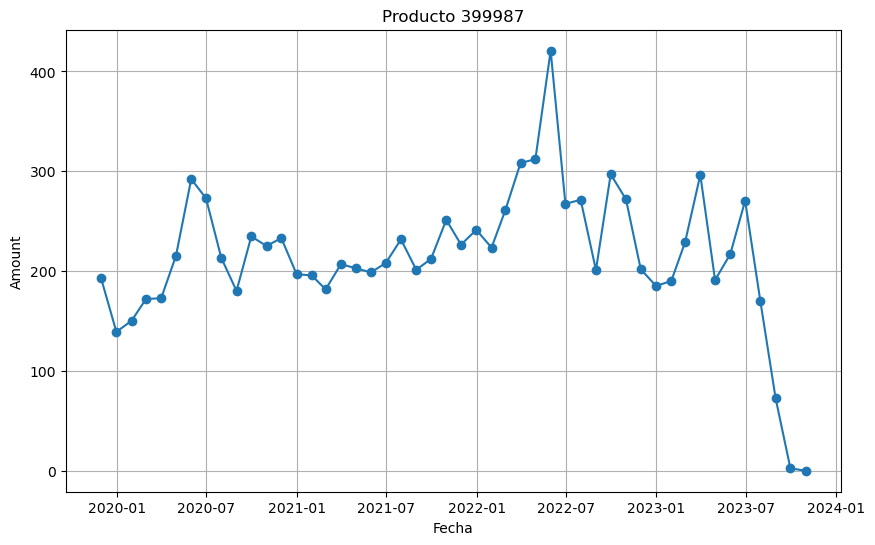

In [106]:
pdto_399987 = df[df['customer_id'] == 399987]
pdto_399987.sort_values(by='dt', inplace=True)
pdto_399987.set_index('dt', inplace=True)

# Crear el gráfico de la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(pdto_399987.index, pdto_399987['amount'], marker='o', linestyle='-')
plt.title('Producto 399987')
plt.xlabel('Fecha')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

C:\Users\jesus\AppData\Local\Temp\ipykernel_2480\1086245735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdto_100000.sort_values(by='dt', inplace=True)


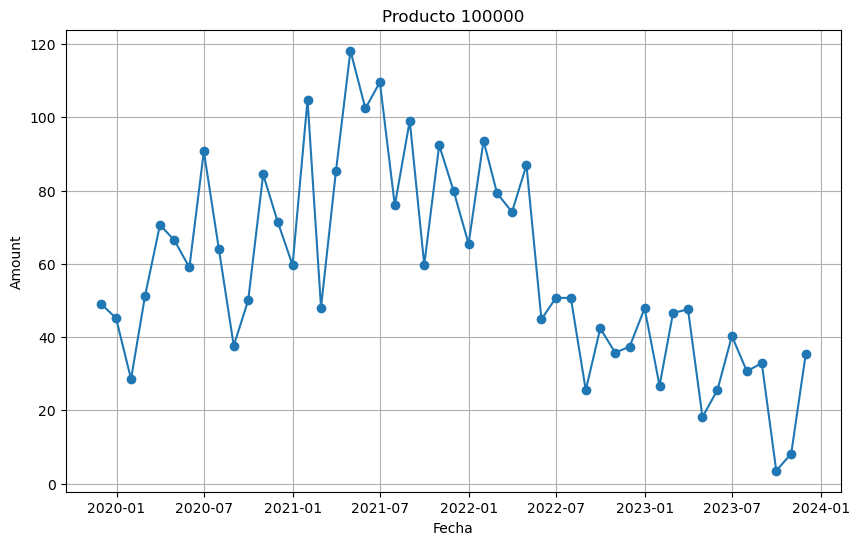

In [107]:
pdto_100000 = df[df['customer_id'] == 100000]
pdto_100000.sort_values(by='dt', inplace=True)
pdto_100000.set_index('dt', inplace=True)

# Crear el gráfico de la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(pdto_100000.index, pdto_100000['amount'], marker='o', linestyle='-')
plt.title('Producto 100000')
plt.xlabel('Fecha')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

In [108]:
df['año'] = df['dt'].dt.year
df['mes'] = df['dt'].dt.month

In [109]:
df

,customer_id,month,amount,churn_next_month,type,dt,año,mes
0,100000,202102,48.0726,0.0,Estanquillos / kioscos,2021-02-28,2021,2
1,100000,202306,40.2995,0.0,Estanquillos / kioscos,2023-06-30,2023,6
2,100000,202308,32.8990,0.0,Estanquillos / kioscos,2023-08-31,2023,8
3,100000,202207,50.7222,0.0,Estanquillos / kioscos,2022-07-31,2022,7
4,100000,202212,47.8690,0.0,Estanquillos / kioscos,2022-12-31,2022,12
...,...,...,...,...,...,...,...,...
5385474,399999,202004,111.3280,0.0,Hogar con Venta,2020-04-30,2020,4
5385475,399999,202302,0.0000,0.0,Hogar con Venta,2023-02-28,2023,2
5385476,399999,202310,0.0000,0.0,Hogar con Venta,2023-10-31,2023,10
5385477,399999,202210,93.5929,0.0,Hogar con Venta,2022-10-31,2022,10


# Separar dataframe de prediccion

In [110]:
df_predictions = df[df['churn_next_month'].isnull()]   
df = df.dropna(subset=['churn_next_month'])

In [111]:
df_predictions

,customer_id,month,amount,churn_next_month,type,dt,año,mes
48,100000,202311,35.259100,NaN,Estanquillos / kioscos,2023-11-30,2023,11
97,100001,202311,43.240800,NaN,Abarrotes / Almacenes / Bodegas / Víveres,2023-11-30,2023,11
187,100005,202311,152.262700,NaN,Hogar con Venta,2023-11-30,2023,11
236,100006,202311,992.067200,NaN,Abarrotes / Almacenes / Bodegas / Víveres,2023-11-30,2023,11
320,100008,202311,1126.959138,NaN,Minisuper / Minimarket,2023-11-30,2023,11
...,...,...,...,...,...,...,...,...
5385231,399981,202311,873.917300,NaN,Abarrotes / Almacenes / Bodegas / Víveres,2023-11-30,2023,11
5385280,399982,202311,8.902000,NaN,Hogar con Venta,2023-11-30,2023,11
5385323,399986,202311,506.855043,NaN,Frutas y Verduras,2023-11-30,2023,11
5385420,399991,202311,20.993900,NaN,Estanquillos / kioscos,2023-11-30,2023,11


In [112]:
# Guardar dataframe
df.to_csv('df.csv', index=False)

In [114]:
df[(df['churn_next_month'] == 0) & (df['amount'] == 0)]

,customer_id,month,amount,churn_next_month,type,dt,año,mes
396,100020,202010,0.0,0.0,Hogar con Venta,2020-10-31,2020,10
400,100020,202009,0.0,0.0,Hogar con Venta,2020-09-30,2020,9
417,100020,202011,0.0,0.0,Hogar con Venta,2020-11-30,2020,11
427,100020,202005,0.0,0.0,Hogar con Venta,2020-05-31,2020,5
429,100020,202006,0.0,0.0,Hogar con Venta,2020-06-30,2020,6
...,...,...,...,...,...,...,...,...
5385457,399999,202108,0.0,0.0,Hogar con Venta,2021-08-31,2021,8
5385462,399999,202112,0.0,0.0,Hogar con Venta,2021-12-31,2021,12
5385464,399999,202111,0.0,0.0,Hogar con Venta,2021-11-30,2021,11
5385475,399999,202302,0.0,0.0,Hogar con Venta,2023-02-28,2023,2


C:\Users\jesus\AppData\Local\Temp\ipykernel_2480\872355835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdto_100020.sort_values(by='dt', inplace=True)


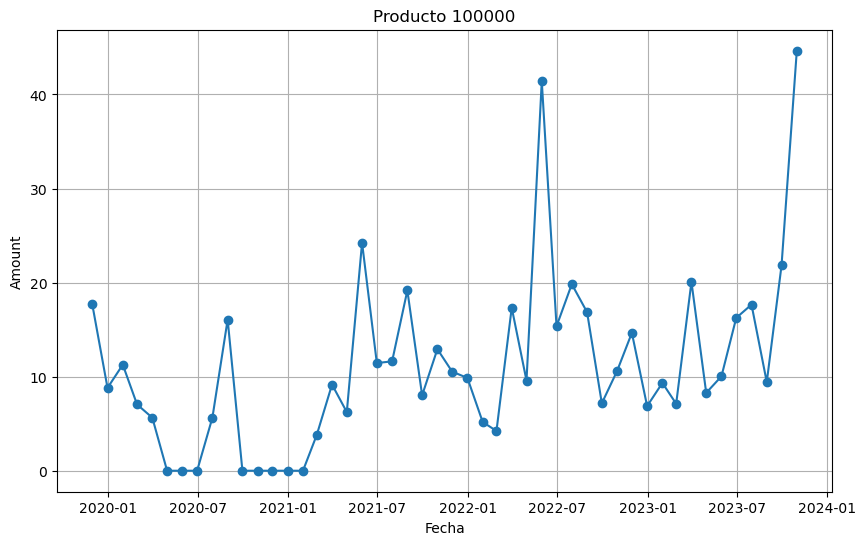

In [115]:
pdto_100020 = df[df['customer_id'] == 100020]
pdto_100020.sort_values(by='dt', inplace=True)
pdto_100020.set_index('dt', inplace=True)

# Crear el gráfico de la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(pdto_100020.index, pdto_100020['amount'], marker='o', linestyle='-')
plt.title('Producto 100000')
plt.xlabel('Fecha')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

<Axes: xlabel='churn_next_month'>

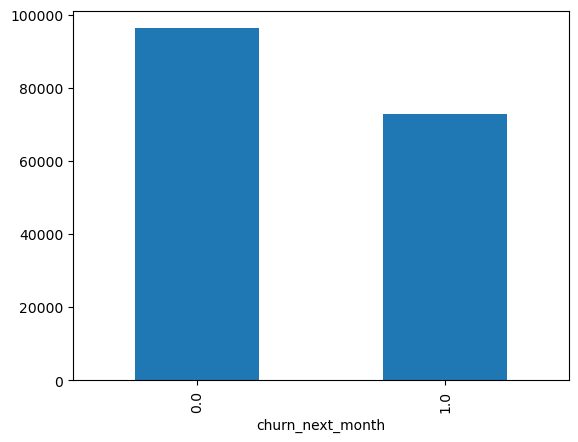

In [117]:
# Cuantos clientes hicieron churn 
df.groupby('customer_id')['churn_next_month'].sum().value_counts().plot(kind='bar')

In [120]:
df['type'].value_counts()

type
Hogar con Venta                                  1421556
Estanquillos / kioscos                           1375933
Abarrotes / Almacenes / Bodegas / Víveres        1374764
Cerveza y Licores                                 471011
Frutas y Verduras                                 155342
Farmacia Independiente                             89475
Carnicería / Pollería / Pescadería                 86747
Tortillería                                        79914
Tiendas de Alimentos Especializados Orgánicos      78975
Minisuper / Minimarket                             74361
Panadería / Pastelería                             37417
Mayorista Abarrotero                               34260
TDC/Proximidad Independiente                       12148
Name: count, dtype: int64

In [123]:
df.groupby('type')['customer_id'].nunique().reset_index()

,type,customer_id
0,Abarrotes / Almacenes / Bodegas / Víveres,36746
1,Carnicería / Pollería / Pescadería,2781
2,Cerveza y Licores,13496
3,Estanquillos / kioscos,37473
4,Farmacia Independiente,2963
5,Frutas y Verduras,5273
6,Hogar con Venta,61042
7,Mayorista Abarrotero,863
8,Minisuper / Minimarket,1884
9,Panadería / Pastelería,1224


In [124]:
df.groupby(['type', 'churn_next_month'])['customer_id'].nunique().reset_index()

,type,churn_next_month,customer_id
0,Abarrotes / Almacenes / Bodegas / Víveres,0.0,36601
1,Abarrotes / Almacenes / Bodegas / Víveres,1.0,10567
2,Carnicería / Pollería / Pescadería,0.0,2764
3,Carnicería / Pollería / Pescadería,1.0,1019
4,Cerveza y Licores,0.0,13409
5,Cerveza y Licores,1.0,4554
6,Estanquillos / kioscos,0.0,37282
7,Estanquillos / kioscos,1.0,12027
8,Farmacia Independiente,0.0,2949
9,Farmacia Independiente,1.0,1120


In [126]:
df_predictions

,customer_id,month,amount,churn_next_month,type,dt,año,mes
48,100000,202311,35.259100,NaN,Estanquillos / kioscos,2023-11-30,2023,11
97,100001,202311,43.240800,NaN,Abarrotes / Almacenes / Bodegas / Víveres,2023-11-30,2023,11
187,100005,202311,152.262700,NaN,Hogar con Venta,2023-11-30,2023,11
236,100006,202311,992.067200,NaN,Abarrotes / Almacenes / Bodegas / Víveres,2023-11-30,2023,11
320,100008,202311,1126.959138,NaN,Minisuper / Minimarket,2023-11-30,2023,11
...,...,...,...,...,...,...,...,...
5385231,399981,202311,873.917300,NaN,Abarrotes / Almacenes / Bodegas / Víveres,2023-11-30,2023,11
5385280,399982,202311,8.902000,NaN,Hogar con Venta,2023-11-30,2023,11
5385323,399986,202311,506.855043,NaN,Frutas y Verduras,2023-11-30,2023,11
5385420,399991,202311,20.993900,NaN,Estanquillos / kioscos,2023-11-30,2023,11


In [127]:
#guardar dataframe de predicciones
df_predictions.to_csv('df_predictions.csv', index=False)